# Лабораторная работа №2

## Цель работы
<font size='3'>Ознакомиться с методами поиска минимума функции двух переменных в оптимизационных задачах.<br>
Изучить методы наискорейшего спуска, покоординатного спуска и применить их на практических числовых задачах.</font>

## План работы
<font size='3'>Написать программу на ЭВМ для нахождения минимума функции $u=f(x,y)$ на области определения функции методами Гаусса-Зейделя (покоординатный спуск) и наискорейшего спуска (Коши):<br></font>
<font size='3'>1. С использованием ПО исследовать алгоритм на заданной тестовой функции, осуществляя спуск из различных исходных точек (не менее трех). Исследовать сходимость алгоритма, фиксируя точность определения минимума, количество итераций метода и количество вычислений функции в зависимости от задаваемой точности поиска. Точность задать самостоятельно в зависимости от задаваемой точности поиска. Точность задать самостоятельно в пределах 0.001 - 0.01. Результатом выполнения данного пункта должны быть выводы об объеме вычислений в зависимости от задаваемой точности и начального приближения.</font><br>
<font size='3'>2. Построить траекторию спуска различных алгоритмов из одной и той же исходной точки с одинаковой точностью. В отчете наложить эту траекторию на рисунок с линиями равного уровня заданной функции.</font>

# Выбрана функция 11-15 вариантов и "придуманы" свои параметры
$\large\textbf{Найти минимум функции}$<br>
$\large f(x, y) = 100 - \frac{2}{1+{(\frac{x-1}{1})^2} +{(\frac{y-4}{2})^2}} - \frac{3}{1+{(\frac{x-4}{1})^2} +{(\frac{y-3}{2})^2}} $<br/><br/>
$A_1 = 2; A_2 = 3; a_1 = 1; a_2 = 4; b = 1; c_1 = 4; c_2 = 3; d = 2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, Markdown, Latex

In [2]:
def f(x, y):
    func = 100 - (2 / (1 + ((x-1) / 1)**2 + ((y-4)/2)**2 )) - (3 / (1 + ((x-4) / 1)**2 + ((y-3)/2)**2 ))
    return func

In [3]:
x = np.linspace(-10, 15, num=100)
y = np.linspace(-50, 50, num=100)

In [4]:
gx, gy = np.meshgrid(x, y)
z = f(gx, gy)

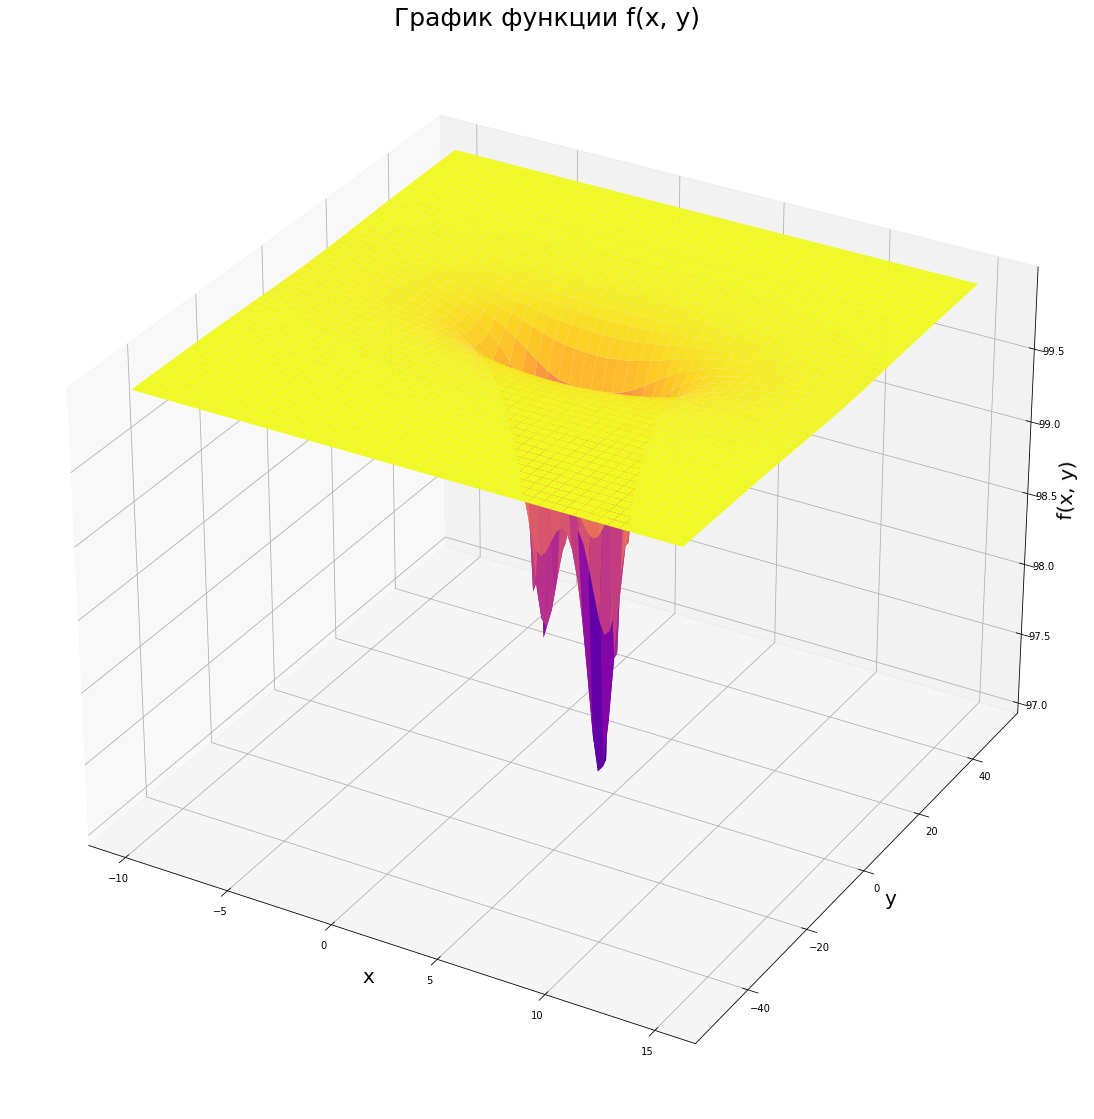

In [5]:
fig = plt.figure(figsize=(20, 15))
ax = Axes3D(fig)
ax.plot_surface(gx, gy, z, cmap=cm.plasma);
ax.set_xlabel('x', fontsize=20);
ax.set_ylabel('y', fontsize=20);
ax.set_zlabel('f(x, y)', fontsize=20);
ax.set_title("График функции f(x, y)", fontsize=25);

# Метод одномерной оптимизации (дихотомия)

In [6]:
def dichotomy(func: callable, interval: tuple, precision=0.001):
    a, b = interval
    offset = precision / 2
    calcs_count = 0
    while True:
        if abs(b - a) <= precision:
            return (a + b) / 2, calcs_count
        l = (a + b) / 2 - offset / 2
        func_l = func(l)
        m = (a + b) / 2 + offset / 2
        func_m = func(m)
        calcs_count += 2
        
        if func_l <= func_m:
            b = m
        else:
            a = l

# Метод покоординатного спуска (Гаусса - Зейделя)

## Программная реализация метода покоординатного спуска

In [7]:
def prepare_f1(X, j):
    
    def g(x):
        return f(x, X[-1]) if j == 0 else f(X[0], x)
     
    return g

In [8]:
def Seidel_Gauss(x_start, precision, interval):
    n = x_start.size
    X = [x_start]
    k = 0
    calcs_count = 0
    iter_count = 0
    while True:
        iter_count += 1
        for j in range(n):
            g = prepare_f1(X[k], j)
            new_X, count = dichotomy(g, interval, precision)
            calcs_count += count
            X.append(np.zeros(2, dtype=float))
            X[k + 1] = X[k].copy()
            X[k + 1][j] = new_X
            if np.abs(f(*X[k + 1]) - f(*X[k])) <= precision:
                return np.array(X), iter_count, calcs_count
            k += 1

## Результаты выполнения метода  покоординатного спуска

In [9]:
precision = 0.001
x1 = np.array([0, 0], dtype=float)
X1, iter_count, calcs_count = Seidel_Gauss(x1, precision, (-10, 10))

In [10]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x1[0], x1[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X1[-1][0], X1[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X1[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.001$

$x^{(0)} = \,$$(0.0, 0.0)$

$x_{min} = \,$$(3.9807659568786633, 3.0063640480041505)$

$f(x_{min}) = \,$$96.8037413763694$

$\text{Количество итераций метода: }$$2$

$\text{Количество вычислений функции: }$$128$

In [11]:
precision = 0.005
x2 = np.array([10, -10], dtype=float)
X2, iter_count, calcs_count = Seidel_Gauss(x2, precision, (-15, 15))

In [12]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x2[0], x2[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X2[-1][0], X2[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X2[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода = }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции = }$" + rf"${calcs_count}$"))

$\varepsilon = 0.005$

$x^{(0)} = \,$$(10.0, -10.0)$

$x_{min} = \,$$(3.981296615600585, 3.0072566986083986)$

$f(x_{min}) = \,$$96.80374312802734$

$\text{Количество итераций метода = }$$2$

$\text{Количество вычислений функции = }$$112$

In [13]:
x3 = np.array([1, 5], dtype=float)
precision = 0.01
X3, iter_count, calcs_count = Seidel_Gauss(x3, precision, (-30, 30))

In [14]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x3[0], x3[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X3[-1][0], X3[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X3[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода = }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции = }$" + rf"${calcs_count}$"))

$\varepsilon = 0.01$

$x^{(0)} = \,$$(1.0, 5.0)$

$x_{min} = \,$$(3.9822120666503906, 3.0081721496582032)$

$f(x_{min}) = \,$$96.80375097995531$

$\text{Количество итераций метода = }$$2$

$\text{Количество вычислений функции = }$$112$

# Метод наискорейшего спуска

$\large\text{Необходимо найти градиент функции }f(x, y)$

$\large f(x, y) = 100 - \frac{2}{1+{(\frac{x-1}{1})^2} +{(\frac{y-4}{2})^2}} - \frac{3}{1+{(\frac{x-4}{1})^2} +{(\frac{y-3}{2})^2}} $

$\large \frac{\partial f}{\partial x} = \frac{4(x-1)}{(1 + {(x-1)^2} + {(\frac{y-4}{2})^2})^2} + \frac{6(x - 4)}{(1+{(x-4)^2} + (\frac{y-3}{2})^2)^2}$<br><br>
$\large \frac{\partial f}{\partial y} = \frac{(y-4)}{(1 + {(x-1)^2} + {(\frac{y-4}{2})^2})^2} + \frac{\frac{3}{2}(y - 3)}{(1+{(x-4)^2} + (\frac{y-3}{2})^2)^2}$<br><br>

## Функция расчета градиента в точке

In [15]:
def grad_f(x, y):
    df_dx = (4*(x-1)) / (1 + (x-1)**2 + ((y-4) / 2)**2)**2 + (6*(x-4)) / (1 + (x-4)**2 + ((y-3) / 2)**2)**2
    df_dy = (y-4) / (1 + (x-1)**2 + ((y-4) / 2)**2)**2 + ((3/2)*(y-3))  / (1 + (x-4)**2 + ((y-3) / 2)**2)**2
    grad = np.array((df_dx, df_dy))
    grad_norm = np.linalg.norm(grad)
    return grad, grad_norm

## Программная реализация метода наискорейшего спуска

In [16]:
def prepare_f2(X, S):
    def g(l):
        return f(*(X + l * S))
     
    return g

In [17]:
def Steepest_Descent(x_start, precision, interval):
    X = [x_start]
    S = []
    k = 0
    iter_count = 0
    calcs_count = 0
    
    while True:
        iter_count += 1
        grad, grad_norm = grad_f(*X[k])
        if grad_norm < precision:
            return np.array(X), iter_count, calcs_count
        S.append(-grad / grad_norm)
        g = prepare_f2(X[k], S[k])
        step, count = dichotomy(g, interval, precision)
        calcs_count += count
        X.append(np.array(X[k] + step * S[k]))
        k += 1

## Результаты выполнения метода наискорейшего спуска

In [18]:
precision = 0.001
x1 = np.array([0, 0], dtype=float)
X1, iter_count, calcs_count = Steepest_Descent(x1, precision, (-10, 10))

In [19]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x1[0], x1[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X1[-1][0], X1[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X1[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.001$

$x^{(0)} = \,$$(0.0, 0.0)$

$x_{min} = \,$$(3.9806777422781927, 3.0058920116408396)$

$f(x_{min}) = \,$$96.80374156074579$

$\text{Количество итераций метода: }$$12$

$\text{Количество вычислений функции: }$$352$

In [20]:
x2 = np.array([10, -10], dtype=float)
precision = 0.005
X2, iter_count, calcs_count = Steepest_Descent(x2, precision, (-15, 15))

In [21]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x2[0], x2[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X2[-1][0], X2[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X2[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.005$

$x^{(0)} = \,$$(10.0, -10.0)$

$x_{min} = \,$$(1.044911216583615, 3.981808781274525)$

$f(x_{min}) = \,$$97.70339469425441$

$\text{Количество итераций метода: }$$12$

$\text{Количество вычислений функции: }$$308$

In [22]:
x3 = np.array([1, 5], dtype=float)
precision = 0.01
X3, iter_count, calcs_count = Steepest_Descent(x3, precision, (-30, 30))

In [23]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x3[0], x3[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X3[-1][0], X3[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X3[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.01$

$x^{(0)} = \,$$(1.0, 5.0)$

$x_{min} = \,$$(1.0451905606090572, 3.9898568917162276)$

$f(x_{min}) = \,$$97.7034011162467$

$\text{Количество итераций метода: }$$5$

$\text{Количество вычислений функции: }$$112$

# Алгоритм Флетчера Ривса

## Реализация алгоритма Флетчера-Ривса

In [24]:
def prepare_f3(X, S):
    def g(l):
        return f(*(X + l * S))
     
    return g

In [25]:
def Fletcher_Reeves(x_start, precision, interval):
    X = [x_start]
    grad, _ = grad_f(*x_start)
    S = [-grad]
    k = 0
    iter_count = 0
    calcs_count = 0
    
    while True:
        iter_count += 1
        for i in range(X[k].size):
            grad, grad_norm = grad_f(*X[k])
            if grad_norm < precision:
                return np.array(X), iter_count, calcs_count
            
            g = prepare_f3(X[k], S[k])
            step, count = dichotomy(g, interval, precision)
            calcs_count += count
            X.append(X[k] + step * S[k])
            grad_next, grad_norm_next = grad_f(*X[k + 1])
            S.append(-grad_next + (grad_norm_next**2 / grad_norm**2) * S[k])
            k += 1
        S[k], _ = grad_f(*X[k])
        S[k] *= -1

## Результаты выполнения алгоритма Флетчера-Ривса

In [26]:
precision = 0.001
x1 = np.array([0, 0], dtype=float)
X1, iter_count, calcs_count = Fletcher_Reeves(x1, precision, (-10, 10))

In [27]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x1[0], x1[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X1[-1][0], X1[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X1[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.001$

$x^{(0)} = \,$$(0.0, 0.0)$

$x_{min} = \,$$(1.0447163168365905, 3.985093148258143)$

$f(x_{min}) = \,$$97.70338920026336$

$\text{Количество итераций метода: }$$6$

$\text{Количество вычислений функции: }$$320$

In [28]:
x2 = np.array([10, -10], dtype=float)
precision = 0.005
X2, iter_count, calcs_count = Fletcher_Reeves(x2, precision, (-15, 15))

In [29]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x2[0], x2[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X2[-1][0], X2[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X2[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.005$

$x^{(0)} = \,$$(10.0, -10.0)$

$x_{min} = \,$$(1.0447329282063098, 3.986465012560522)$

$f(x_{min}) = \,$$97.70339015178587$

$\text{Количество итераций метода: }$$14$

$\text{Количество вычислений функции: }$$756$

In [30]:
x3 = np.array([1, 5], dtype=float)
precision = 0.01
X3, iter_count, calcs_count = Fletcher_Reeves(x3, precision, (-30, 30))

In [31]:
display(Markdown(rf"$\varepsilon = {precision}$"))
display(Markdown("$x^{(0)} = \,$" + f"${x3[0], x3[1]}$"))
display(Markdown("$x_{min} = \,$" + f"${X3[-1][0], X3[-1][1]}$"))
display(Markdown("$f(x_{min}) = \,$" + f"${f(*X3[-1])}$"))
display(Markdown(r"$\text{Количество итераций метода: }$" + rf"${iter_count}$"))
display(Markdown(r"$\text{Количество вычислений функции: }$" + rf"${calcs_count}$"))

$\varepsilon = 0.01$

$x^{(0)} = \,$$(1.0, 5.0)$

$x_{min} = \,$$(1.0446723769395445, 3.9851395632027056)$

$f(x_{min}) = \,$$97.70338920625149$

$\text{Количество итераций метода: }$$3$

$\text{Количество вычислений функции: }$$112$

# График с траекториями спуска из одной и той же точки для разных  методов

$\large \text{Стартовая точка }x^{(0)} = (-5, 20)$<br><br>
$\large \text{Точность } \varepsilon = 0.001$

In [32]:
precision = 0.001
x0 = np.array([-5, 20], dtype=float)
X1, _, _ = Seidel_Gauss(x0, precision, (-10, 10))
X2, _, _ = Steepest_Descent(x0, precision, (-10, 10))
X3, _, _ = Fletcher_Reeves(x0, precision, (-10, 10))

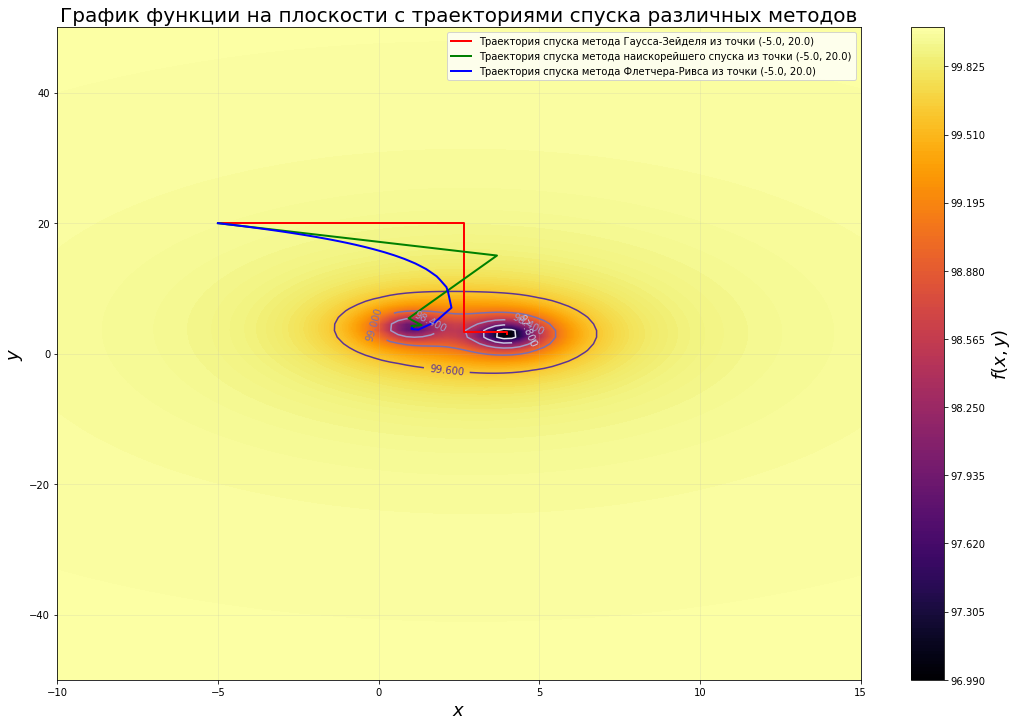

In [33]:
fig, ax = plt.subplots(figsize=(18, 12))
ax.set_xlabel("$x$", fontsize=18)
ax.set_ylabel("$y$", fontsize=18)
ax.set_title("График функции на плоскости с траекториями спуска различных методов", fontsize=20)
contourf = ax.contourf(x, y, z, levels=200, cmap=cm.inferno)
color_bar = fig.colorbar(contourf)
color_bar.set_label("$f(x, y)$", fontsize=18)
contour = ax.contour(x, y, z, cmap=cm.Purples, levels=5)
plt.clabel(contour, zorder=2)
plt.plot(X1.T[0], X1.T[1], color='r', zorder=2, linewidth=2, label=f'Траектория спуска метода Гаусса-Зейделя из точки {x0[0], x0[1]}')
plt.plot(X2.T[0], X2.T[1], color='g', zorder=2, linewidth=2, label=f'Траектория спуска метода наискорейшего спуска из точки {x0[0], x0[1]}')
plt.plot(X3.T[0], X3.T[1], color='b', zorder=2, linewidth=2, label=f'Траектория спуска метода Флетчера-Ривса из точки {x0[0], x0[1]}')
plt.grid(zorder=1, alpha=0.2)
plt.legend();

# Выводы

### Метод покоординатного спуска, в отличии от других методов, на заданных точках всегда находил глобальный минимум, в то время как другие методы часто попадали в точку локального минимума. Это зависит от начальной точки, т.к. при смене начальной точки можно добиться попадания в глобальный минимум.
### При уменьшении точности у метода наискорейшего спуска уменьшается количество вычислений функции, также как и у метода Флетчера-Ривса (но это так же может зависить и от начальной точки).